In [10]:
import pandas as pd 
import matplotlib.pyplot as plt 
import requests
import math
from termcolor import colored as cl 
import numpy as np
import glob
import os


plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

In [4]:
def bb(data, window):

    sma = data.rolling(window = window).mean()
    std = data.rolling(window = window).std()
    
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    
    return upper_bb, lower_bb, sma


In [2]:
path = r'data/'                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

#df_from_each_file = (pd.read_csv(f) for f in all_files)
#concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)


In [5]:
# NB SAMPLE
window = 20

for file in all_files:
    data = pd.read_csv(file)

    data = data.set_index('datetime')
    
    upper_bb, lower_bb, sma = bb(data['c'], window)

    
    data['upper_bb'] = upper_bb
    data['lower_bb'] = lower_bb
    data['sma'] = sma
    
    print(data)
    

                           o         h        l        c            v  \
datetime                                                                
2021-11-04 01:00:00  0.02300  16.79999  0.02300  3.30427  253270565.0   
2021-11-05 01:00:00  3.30427   3.42565  2.50000  2.59758   63669516.0   
2021-11-06 01:00:00  2.59824   2.83468  2.17800  2.20000   30882202.0   
2021-11-07 01:00:00  2.20000   2.36450  2.05000  2.07632   16428814.0   
2021-11-08 01:00:00  2.07578   2.07633  1.81173  1.91982   21982518.0   
2021-11-09 01:00:00  1.92116   2.10402  1.85000  1.85301   16667851.0   
2021-11-10 01:00:00  1.85301   2.26200  1.85000  1.96255   28448768.0   
2021-11-11 01:00:00  1.96688   2.02999  1.86500  1.88187    8345513.0   
2021-11-12 01:00:00  1.88187   1.89098  1.68492  1.77922   10459569.0   
2021-11-13 01:00:00  1.77922   2.85000  1.76000  2.29207  113516656.0   
2021-11-14 01:00:00  2.29571   2.31440  2.06150  2.13265   22783103.0   
2021-11-15 01:00:00  2.13265   2.34590  1.96000  1.

                           o        h        l        c            v  \
datetime                                                               
2020-08-18 02:00:00   2.0900   4.4400   2.0000   3.1000   6039881.97   
2020-08-19 02:00:00   3.1000   3.1999   2.6400   2.9500  15895774.92   
2020-08-20 02:00:00   2.9449   3.1111   2.6000   2.9000  11040863.60   
2020-08-21 02:00:00   2.8978   3.0900   2.6826   2.8330   9765153.74   
2020-08-22 02:00:00   2.8387   4.5500   2.7820   4.4546  41611476.51   
...                      ...      ...      ...      ...          ...   
2021-11-26 01:00:00  39.4800  39.6200  33.6700  34.5600  16596267.73   
2021-11-27 01:00:00  34.5500  36.1200  34.4300  35.1600   6817533.23   
2021-11-28 01:00:00  35.1600  35.8500  32.2100  35.7600  10439305.23   
2021-11-29 01:00:00  35.7500  37.5300  35.4000  37.1000   7442054.72   
2021-11-30 01:00:00  37.1000  39.3500  35.2800  38.4200   9174065.42   

                      upper_bb   lower_bb      sma  
datetime  

                          o       h       l       c             v  upper_bb  \
datetime                                                                      
2021-04-13 02:00:00  0.1000  5.9500  0.1000  0.7269  9.342525e+08       NaN   
2021-04-14 02:00:00  0.7269  0.9389  0.5502  0.5830  7.109577e+08       NaN   
2021-04-15 02:00:00  0.5844  0.5844  0.4658  0.4799  2.053586e+08       NaN   
2021-04-16 02:00:00  0.4800  0.4850  0.3726  0.3829  1.934972e+08       NaN   
2021-04-17 02:00:00  0.3826  0.4499  0.3783  0.3999  1.261135e+08       NaN   
...                     ...     ...     ...     ...           ...       ...   
2021-11-26 01:00:00  0.4844  0.5400  0.3703  0.3989  8.241041e+08  0.455969   
2021-11-27 01:00:00  0.3989  0.4187  0.3617  0.3726  3.802021e+08  0.462377   
2021-11-28 01:00:00  0.3726  0.4200  0.3333  0.4131  5.161537e+08  0.474442   
2021-11-29 01:00:00  0.4129  0.4374  0.3758  0.3795  4.455532e+08  0.480423   
2021-11-30 01:00:00  0.3797  0.4077  0.3630  0.3997 

                           o        h        l        c           v  \
datetime                                                              
2018-06-12 02:00:00  16.2000  16.7999  13.9500  14.6282   744968.58   
2018-06-13 02:00:00  14.7000  14.9731  12.8130  13.8499   781129.30   
2018-06-14 02:00:00  13.8003  14.3409  13.1500  14.0624   682270.16   
2018-06-15 02:00:00  14.0662  14.0748  13.5555  13.8200   486000.73   
2018-06-16 02:00:00  13.8200  14.8800  13.7599  14.4400   663787.16   
...                      ...      ...      ...      ...         ...   
2021-11-26 01:00:00  50.5600  50.6800  44.7000  46.6700  2557480.04   
2021-11-27 01:00:00  46.6600  47.7100  46.3800  46.7800   652336.49   
2021-11-28 01:00:00  46.7700  47.5500  44.4500  47.5000   871658.92   
2021-11-29 01:00:00  47.5000  48.9800  47.0300  48.2200   845896.51   
2021-11-30 01:00:00  48.2100  50.0900  46.2200  48.4600  1237366.89   

                      upper_bb   lower_bb      sma  
datetime               

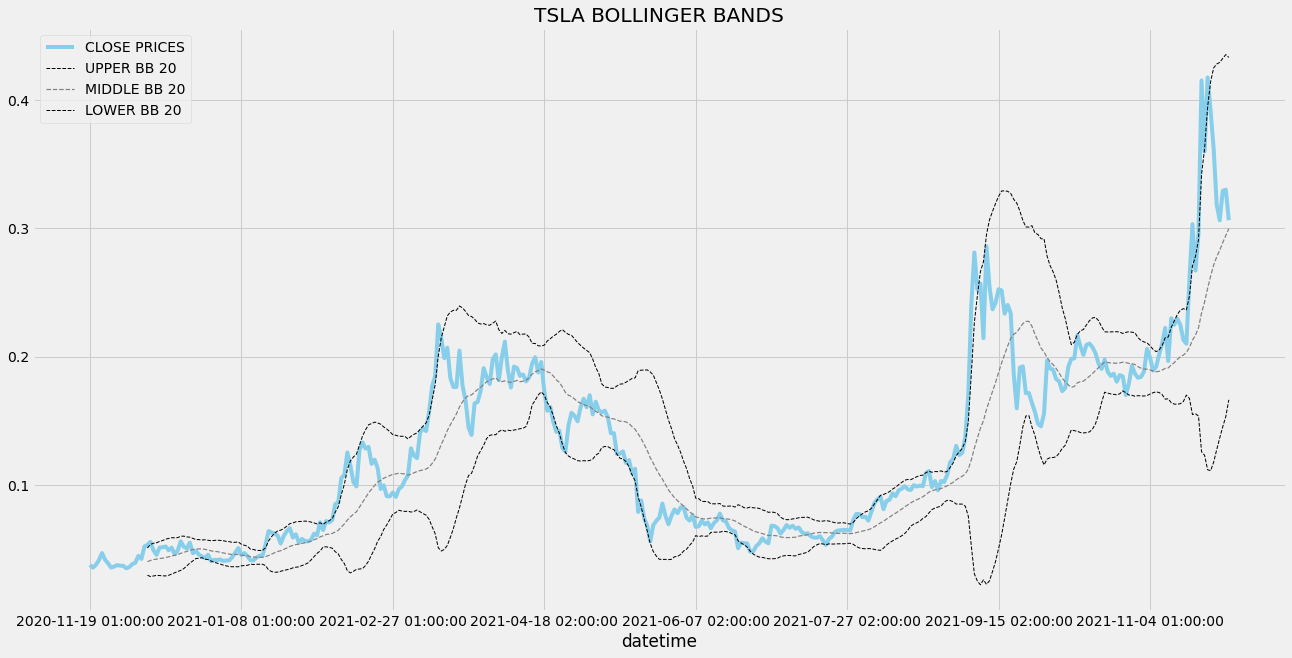

In [7]:
data['c'].plot(label = 'CLOSE PRICES', color = 'skyblue')
data['upper_bb'].plot(label = 'UPPER BB 20', linestyle = '--', linewidth = 1, color = 'black')
data['sma'].plot(label = 'MIDDLE BB 20', linestyle = '--', linewidth = 1.2, color = 'grey')
data['lower_bb'].plot(label = 'LOWER BB 20', linestyle = '--', linewidth = 1, color = 'black')
plt.legend(loc = 'upper left')
plt.title('TSLA BOLLINGER BANDS')
plt.show()

In [8]:
def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            
    return buy_price, sell_price, bb_signal

buy_price, sell_price, bb_signal = implement_bb_strategy(data['c'], data['lower_bb'], data['upper_bb'])

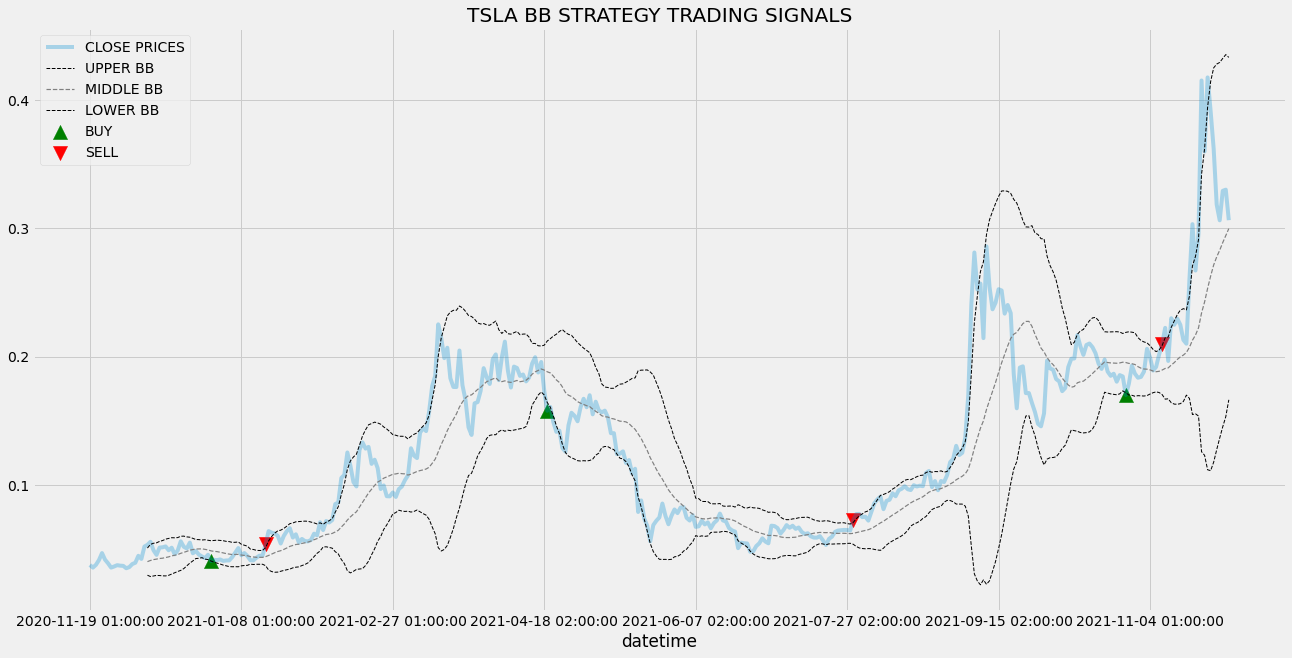

In [9]:
data['c'].plot(label = 'CLOSE PRICES', alpha = 0.3)
data['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
data['sma'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'grey')
data['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(data.index, buy_price, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(data.index, sell_price, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.title('TSLA BB STRATEGY TRADING SIGNALS')
plt.legend(loc = 'upper left')
plt.show()

In [113]:
# https://tradingsim.com/blog/bollinger-bands/
def bb_alarm(dat, lower_bb, upper_bb, momentum=0.5):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0
    
    for i in range(len(dat)):
        # si le prix k-1 est supérieur à la bande inferieur
        # et le prix est inferieur à la bande inferieur
        if dat[i-1] > lower_bb[i-1] and dat[i] < lower_bb[i]:
            signal = 1
            bb_signal.append(signal)
            #to plot
            buy_price.append(dat[i])
            sell_price.append(np.nan)

        elif dat[i-1] < upper_bb[i-1] and dat[i] > upper_bb[i]:
            signal = -1
            bb_signal.append(signal)
            sell_price.append(dat[i])
            buy_price.append(np.nan)

        else:
            if(i != 0):
                bb_signal.append(bb_signal[i-1] * momentum)
            else:
                bb_signal.append(0)
                
            sell_price.append(np.nan)
            buy_price.append(np.nan)
            
            
            
    return buy_price, sell_price, bb_signal

buy_price, sell_price, bb_signal = bb_alarm(data['c'], data['lower_bb'], data['upper_bb'], 0.5)

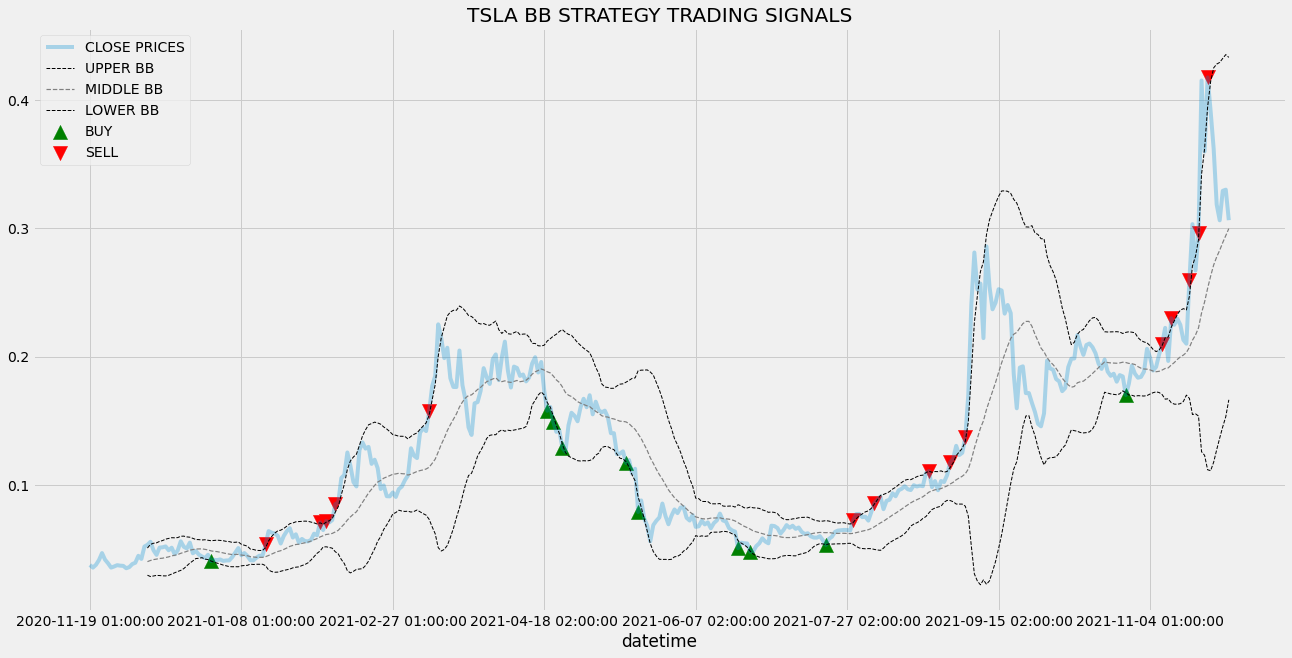

In [114]:
data['c'].plot(label = 'CLOSE PRICES', alpha = 0.3)
data['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
data['sma'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'grey')
data['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(data.index, buy_price, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(data.index, sell_price, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.title('TSLA BB STRATEGY TRADING SIGNALS')
plt.legend(loc = 'upper left')
plt.show()

In [115]:
bb_signal

[0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1,
 0.5,
 0.25,
 0.125,
 0.0625,
 0.03125,
 0.015625,
 0.0078125,
 0.00390625,
 0.001953125,
 0.0009765625,
 0.00048828125,
 0.000244140625,
 0.0001220703125,
 6.103515625e-05,
 3.0517578125e-05,
 1.52587890625e-05,
 7.62939453125e-06,
 -1,
 -0.5,
 -0.25,
 -0.125,
 -0.0625,
 -0.03125,
 -0.015625,
 -0.0078125,
 -0.00390625,
 -0.001953125,
 -0.0009765625,
 -0.00048828125,
 -0.000244140625,
 -0.0001220703125,
 -6.103515625e-05,
 -3.0517578125e-05,
 -1.52587890625e-05,
 -7.62939453125e-06,
 -1,
 -0.5,
 -1,
 -0.5,
 -0.25,
 -1,
 -0.5,
 -0.25,
 -0.125,
 -0.0625,
 -0.03125,
 -0.015625,
 -0.0078125,
 -0.00390625,
 -0.001953125,
 -0.0009765625,
 -0.00048828125,
 -0.000244140625,
 -0.0001220703125,
 -6.103515625e-05,
 -3.0517578125e-05,
 -1.52587890625e-05,
 -7.